# **KERAS REGRESSION - HOUSE PRICE PREDICTION**

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Mouning Google Drive and Load Data**

In [ ]:
from google.colab import drive

In [1]:
drive.mount("/content/drive")

NameError: ignored

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Jose Potilla | Tensorflow/Data/kc_house_data.csv")

## **Explore Data**

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Check Null Values

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Conclusion : Our data set don't contain any null values

In [ ]:
# Describe the behaviour of Dataset

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Conclusion : ID don't have any Mathemetical significance

<Figure size 1000x600 with 0 Axes>

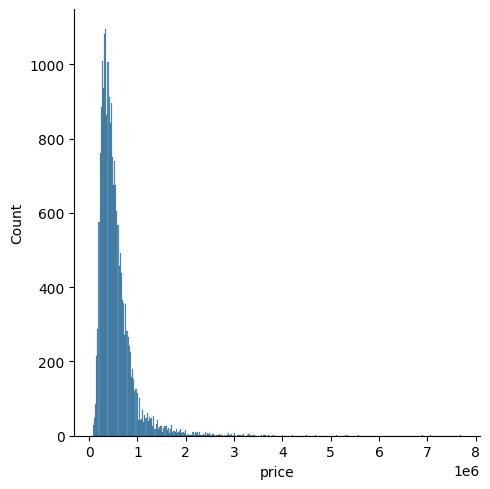

In [ ]:
# Distribution of Price Data

plt.figure(figsize = (10,6))
sns.displot(data = df, x = 'price')

<Axes: xlabel='bedrooms', ylabel='count'>

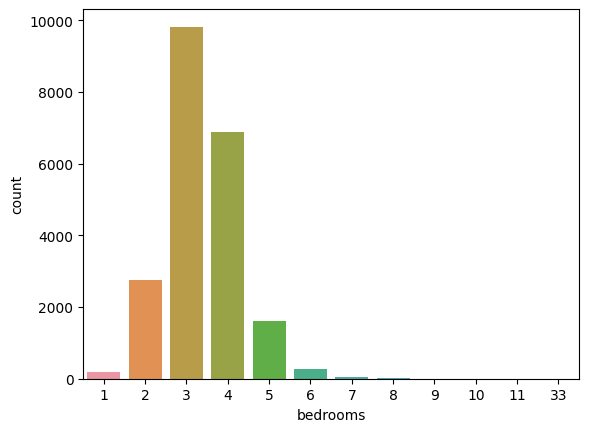

In [ ]:
# Check Count of Bedroom

sns.countplot(data = df, x = 'bedrooms')

In [ ]:
# Correlation of all features

df.corr()

<ipython-input-11-e3b508a84c3f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [ ]:
# Correlation of all features against Price

df.corr()['price'].sort_values()

<ipython-input-12-8637b58621c6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='bedrooms', ylabel='sqft_lot'>

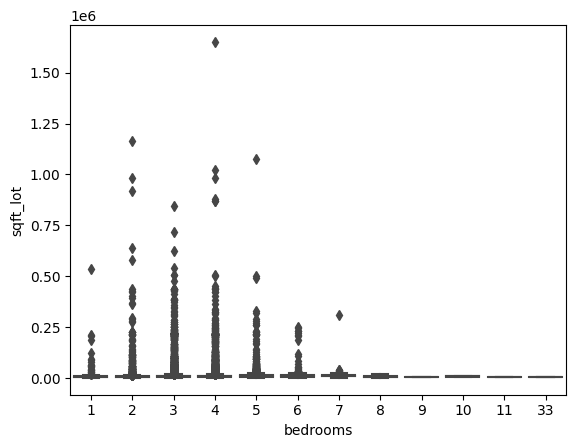

In [ ]:
# Relation between bedroom and are

sns.boxplot(data = df, x = 'bedrooms', y = 'sqft_lot')

<Axes: xlabel='long', ylabel='lat'>

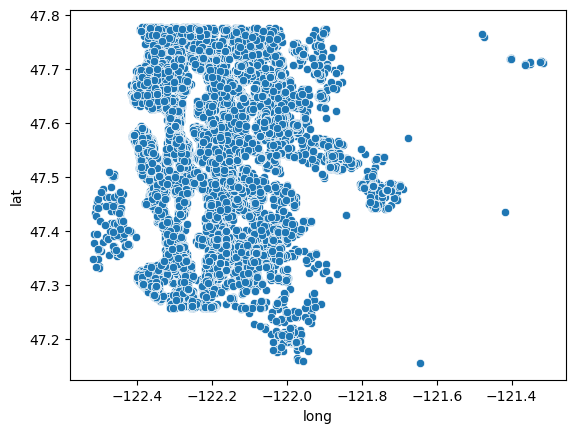

In [ ]:
# Distribution of Price along

sns.scatterplot(data = df, x ='long', y= 'lat')

In [ ]:
# check expensive houses we have in our dataset

df.sort_values('price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [ ]:
# Eliminating Expensive houses (considering 1% of expensive houses)

df['price'].shape[0]*(1/100)

215.97

In [ ]:
non_top_1_percent = df.sort_values('price', ascending=False)[215:]

In [ ]:
non_top_1_percent.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17221,1338600225,5/28/2014,1970000.0,8,3.50,4440,6480,2.0,0,3,...,10,3140,1300,1959,0,98112,47.6310,-122.303,4440,8640
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237


**Conclusion** : non_top_1_percent Dataset contain the houses which are sold in a good price bracker

<Axes: xlabel='long', ylabel='lat'>

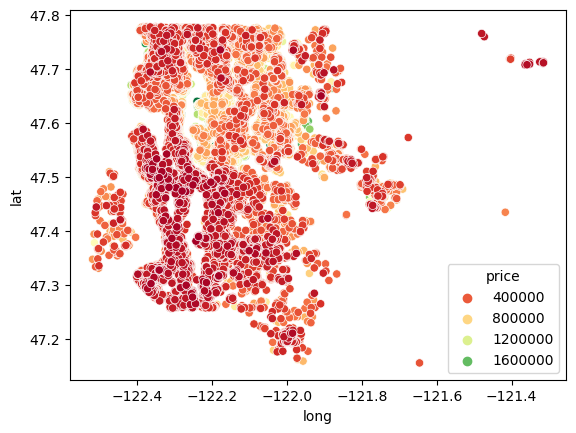

In [ ]:
# Distribute the new data along longitude and lattitude

sns.scatterplot(data = non_top_1_percent, x ='long', y= 'lat', hue = 'price', palette='RdYlGn')

<Axes: xlabel='waterfront', ylabel='price'>

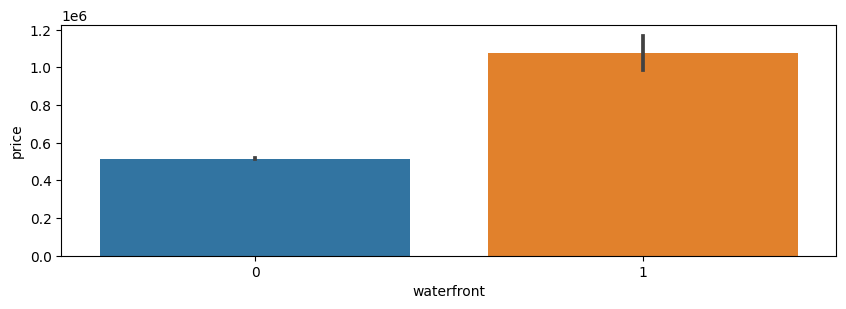

In [ ]:
# See the price against Waterside houses

plt.figure(figsize =(10,3))
sns.barplot(data= non_top_1_percent, x= 'waterfront', y='price')

**Conclusion :** Waterside houses are costly

## **FEATURE ENGINEERING - EDA**

making old_df = df
df = newly created non_top_1_percent

In [ ]:
old_df = df

In [ ]:
old_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df = non_top_1_percent

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17221,1338600225,5/28/2014,1970000.0,8,3.50,4440,6480,2.0,0,3,...,10,3140,1300,1959,0,98112,47.6310,-122.303,4440,8640
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237


In [ ]:
# Dropping Unnecessary Column - ID

df = df.drop('id', axis = 1)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17221,5/28/2014,1970000.0,8,3.50,4440,6480,2.0,0,3,5,10,3140,1300,1959,0,98112,47.6310,-122.303,4440,8640
6329,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237


## **TIME DATE ANALYSIS**

In [ ]:
# Convert datetime to date time

df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Extract the Month and Year

df['year'] = df['date'].apply( lambda date: date.year)
df['month'] = df['date'].apply( lambda date: date.month)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
17221,2014-05-28,1970000.0,8,3.50,4440,6480,2.0,0,3,5,...,1300,1959,0,98112,47.6310,-122.303,4440,8640,2014,5
6329,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,3,...,760,2003,0,98004,47.5876,-122.204,2960,10347,2014,6
12271,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,4,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,2014,10
9166,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,4,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2015,2
12565,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,3,...,0,1998,0,98005,47.6422,-122.157,3900,35237,2015,4


<Axes: xlabel='month', ylabel='price'>

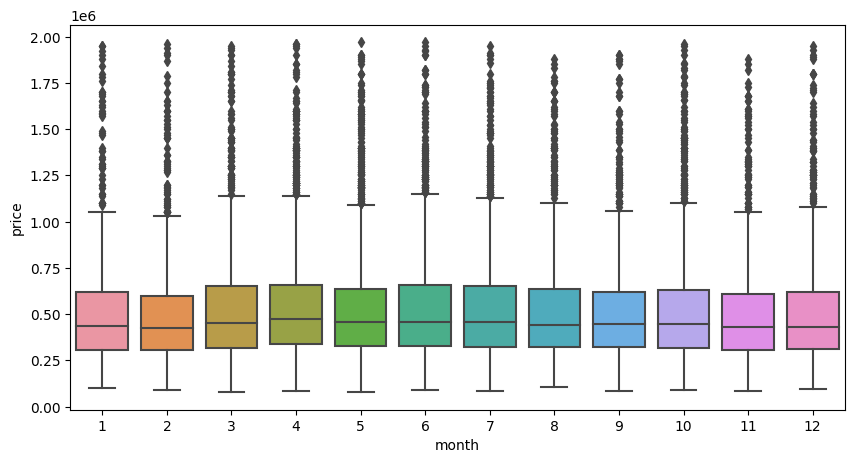

In [ ]:
# Visualise monthwise variation of Price

plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'month', y = 'price')

<ipython-input-47-f1c036247463>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['price'].plot()


<Axes: xlabel='month'>

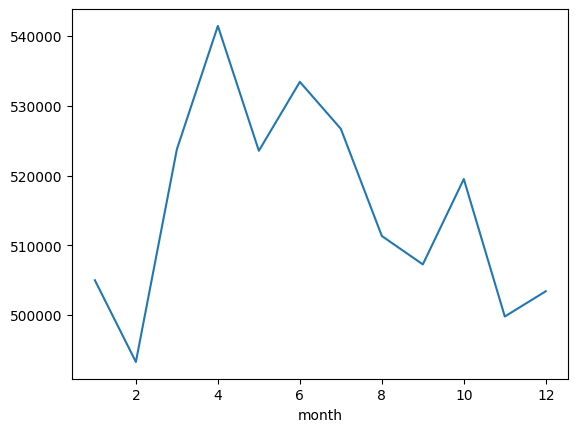

In [ ]:
df.groupby('month').mean()['price'].plot()

<ipython-input-48-284f68b445ad>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean()['price'].plot()


<Axes: xlabel='year'>

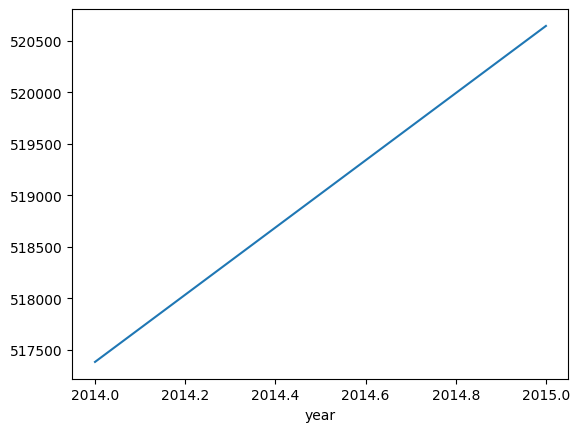

In [ ]:
# Visualise yearwise variation of Price

df.groupby('year').mean()['price'].plot()

In [ ]:
# Drop Date column

df = df.drop('date', axis = 1)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
17221,1970000.0,8,3.50,4440,6480,2.0,0,3,5,10,...,1300,1959,0,98112,47.6310,-122.303,4440,8640,2014,5
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,...,760,2003,0,98004,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,2014,10
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2015,2
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,...,0,1998,0,98005,47.6422,-122.157,3900,35237,2015,4


In [ ]:
# Dropping ZipCode Column
# Domain expert can give some solution with ZIPCODE

df = df.drop('zipcode', axis = 1)

In [ ]:
# yr_renovated

df['yr_renovated'].value_counts()

0       20500
2014       91
2013       36
2000       34
2005       34
        ...  
1934        1
1954        1
1948        1
1959        1
1951        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
# sqft_basement

df['sqft_basement'].value_counts()

0       13052
600       219
500       214
700       214
800       205
        ...  
1852        1
1890        1
1481        1
1284        1
652         1
Name: sqft_basement, Length: 292, dtype: int64

**Conclusion :** sqft_basement, yr_renovated  - We are not going to take any action as most values are 0.

## **SPLIT DATA**

In [ ]:
X = df.drop('price', axis = 1)

In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
17221,8,3.50,4440,6480,2.0,0,3,5,10,3140,1300,1959,0,47.6310,-122.303,4440,8640,2014,5
6329,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
12271,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10
9166,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,47.5287,-122.220,3730,16560,2015,2
12565,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,47.6422,-122.157,3900,35237,2015,4


In [ ]:
y = df['price']

In [ ]:
y.head()

17221    1970000.0
6329     1970000.0
12271    1960000.0
9166     1960000.0
12565    1960000.0
Name: price, dtype: float64

In [ ]:
# Train and Test Data Preparation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 101)

In [ ]:
X_train.shape

(14967, 19)

In [ ]:
y_train.shape

(14967,)

In [ ]:
X_test.shape

(6415, 19)

## **SCALING Trained Data and Test Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

## **MODEL PREPARATION**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

# Hidden Layer
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

# Output Layer
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse')

## **FIT TRAINED DATA TO MODEL**

In [ ]:
model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          epochs = 400, batch_size = 128)

Epoch 1/400
117/117 [==============================] - 5s 5ms/step - loss: 347026718720.0000 - val_loss: 357061427200.0000
Epoch 2/400
117/117 [==============================] - 0s 4ms/step - loss: 346051870720.0000 - val_loss: 353491419136.0000
Epoch 3/400
117/117 [==============================] - 0s 4ms/step - loss: 331219632128.0000 - val_loss: 318154440704.0000
Epoch 4/400
117/117 [==============================] - 0s 4ms/step - loss: 257108328448.0000 - val_loss: 195585261568.0000
Epoch 5/400
117/117 [==============================] - 0s 3ms/step - loss: 117794824192.0000 - val_loss: 69032689664.0000
Epoch 6/400
117/117 [==============================] - 0s 3ms/step - loss: 56194224128.0000 - val_loss: 54946279424.0000
Epoch 7/400
117/117 [==============================] - 0s 4ms/step - loss: 53010780160.0000 - val_loss: 53929201664.0000
Epoch 8/400
117/117 [==============================] - 0s 3ms/step - loss: 52127010816.0000 - val_loss: 53055520768.0000
Epoch 9/400
117/117 [==

In [ ]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,3.470267e+11,3.570614e+11
1,3.460519e+11,3.534914e+11
2,3.312196e+11,3.181544e+11
3,2.571083e+11,1.955853e+11
4,1.177948e+11,6.903269e+10
...,...,...
395,2.018998e+10,2.084398e+10
396,2.017349e+10,2.082298e+10
397,2.016728e+10,2.083756e+10
398,2.015792e+10,2.081709e+10


## **PREDICT THE TEST DATA**

In [ ]:
y_pred = model.predict(X_test)

201/201 [==============================] - 1s 5ms/step


In [ ]:
# Compare Predicted and Test Data

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [ ]:
mean_squared_error(y_pred, y_test)

20822095583.17931

In [ ]:
mean_absolute_error(y_pred, y_test)

96181.76344626851

In [ ]:
explained_variance_score(y_pred, y_test)

0.6611398009519049

Conclusion : Model is not so good, not so bad

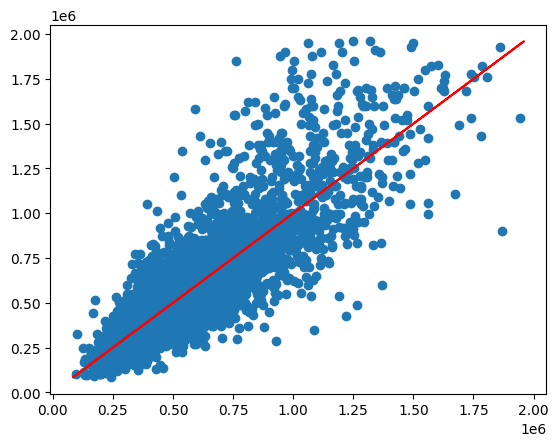

In [ ]:
plt.scatter(y_pred,y_test)
plt.plot(y_test,y_test,'r')

## **Test Model on new Data**

In [ ]:
new = df.drop('price',axis = 1).iloc[0]

In [ ]:
new

bedrooms            8.000
bathrooms           3.500
sqft_living      4440.000
sqft_lot         6480.000
floors              2.000
waterfront          0.000
view                3.000
condition           5.000
grade              10.000
sqft_above       3140.000
sqft_basement    1300.000
yr_built         1959.000
yr_renovated        0.000
lat                47.631
long             -122.303
sqft_living15    4440.000
sqft_lot15       8640.000
year             2014.000
month               5.000
Name: 17221, dtype: float64

In [ ]:
# Scaler Transformation

new = scaler.transform(new.values.reshape(-1,19))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Model Prediction

new_pred = model.predict(new)

1/1 [==============================] - 0s 39ms/step


In [ ]:
new_pred

array([[1581348.8]], dtype=float32)

In [ ]:
# Compare the actual value

new_actual = df['price'].iloc[0]
new_actual

1970000.0

SyntaxError: ignored

# ***CONCLUSION : ***
Actual value          : 1970000.0

Model Predicted value : 1581348

-------------------------------------------------------------------------
**Our model is not so good not so bad**